<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/learning_Rate_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

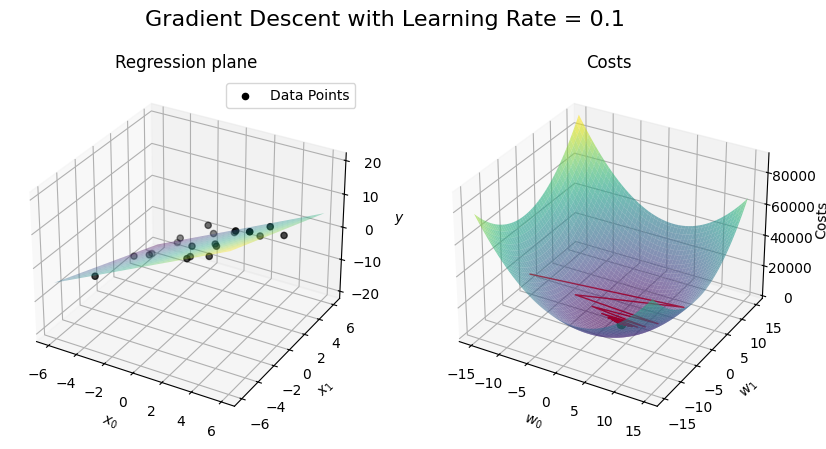

In [1]:
# prompt: In above animation, create a path as a straight line connecting each iteration in a cost graph. Give entire code again

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate synthetic data for regression
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 2))  # 20 data points, 2 features
w_true = np.array([2, -1])  # True weights
y = X @ w_true + np.random.normal(0, 2, size=20)  # y = Xw + noise

# Prepare meshgrid for regression plane and cost function
w0_range = np.linspace(-15, 15, 100)
w1_range = np.linspace(-15, 15, 100)
w0_grid, w1_grid = np.meshgrid(w0_range, w1_range)

costs = np.zeros_like(w0_grid)
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w = np.array([w0_grid[i, j], w1_grid[i, j]])
        residuals = y - X @ w
        costs[i, j] = np.sum(residuals**2)

# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot regression plane
X0, X1 = np.meshgrid(np.linspace(-6, 6, 20), np.linspace(-6, 6, 20))
def regression_plane(w):
    return w[0] * X0 + w[1] * X1

plane = ax1.plot_surface(X0, X1, regression_plane(w_true), alpha=0.4, cmap='viridis')
data_points = ax1.scatter(X[:, 0], X[:, 1], y, color='black', label='Data Points')
ax1.set_title("Regression plane")
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("$x_1$")
ax1.set_zlabel("$y$")
ax1.legend()

# Plot cost function surface
cost_surface = ax2.plot_surface(w0_grid, w1_grid, costs, alpha=0.6, cmap='viridis')
ax2.set_title("Costs")
ax2.set_xlabel("$w_0$")
ax2.set_ylabel("$w_1$")
ax2.set_zlabel("Costs")

# Add animated point and path for gradient descent
current_point, = ax2.plot([], [], [], 'go')
path, = ax2.plot([], [], [], 'r-', linewidth=1) #Line for the path

# Animation setup
n_frames = 100
w_path = [np.array([-10, -8])]  # Initial guess for weights
lr = 0.1

for _ in range(n_frames):
    gradient = -2 * X.T @ (y - X @ w_path[-1])  # Compute gradient
    w_new = w_path[-1] - lr * gradient / len(y)  # Gradient descent update
    w_path.append(w_new)

def update(frame):
    w = w_path[frame]

    # Update regression plane
    for artist in ax1.collections:
        artist.remove()
    plane = ax1.plot_surface(X0, X1, regression_plane(w), alpha=0.4, cmap='viridis')
    data_points = ax1.scatter(X[:, 0], X[:, 1], y, color='black')

    # Update cost surface
    current_cost = np.sum((y - X @ w) ** 2)
    current_point.set_data([w[0]], [w[1]])
    current_point.set_3d_properties(current_cost)

    # Update path
    path_x = [p[0] for p in w_path[:frame+1]]
    path_y = [p[1] for p in w_path[:frame+1]]
    path_z = [np.sum((y - X @ p)**2) for p in w_path[:frame+1]] # Calculate costs for each point in path
    path.set_data(path_x, path_y)
    path.set_3d_properties(path_z)

    return plane, current_point, path #Return path

fig.suptitle(f"Gradient Descent with Learning Rate = {lr}", fontsize=16) #Added this line
anim = FuncAnimation(fig, update, frames=n_frames, interval=10, blit=False)
anim.save('gradient_descent_animation_path.gif', writer='imagemagick')
plt.show()

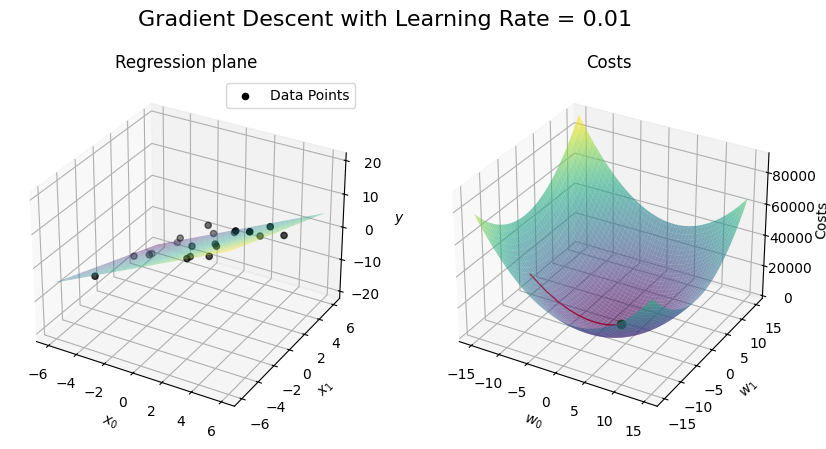

In [2]:
# prompt: In above animation, create a path as a straight line connecting each iteration in a cost graph. Give entire code again

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate synthetic data for regression
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 2))  # 20 data points, 2 features
w_true = np.array([2, -1])  # True weights
y = X @ w_true + np.random.normal(0, 2, size=20)  # y = Xw + noise

# Prepare meshgrid for regression plane and cost function
w0_range = np.linspace(-15, 15, 100)
w1_range = np.linspace(-15, 15, 100)
w0_grid, w1_grid = np.meshgrid(w0_range, w1_range)

costs = np.zeros_like(w0_grid)
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w = np.array([w0_grid[i, j], w1_grid[i, j]])
        residuals = y - X @ w
        costs[i, j] = np.sum(residuals**2)

# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot regression plane
X0, X1 = np.meshgrid(np.linspace(-6, 6, 20), np.linspace(-6, 6, 20))
def regression_plane(w):
    return w[0] * X0 + w[1] * X1

plane = ax1.plot_surface(X0, X1, regression_plane(w_true), alpha=0.4, cmap='viridis')
data_points = ax1.scatter(X[:, 0], X[:, 1], y, color='black', label='Data Points')
ax1.set_title("Regression plane")
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("$x_1$")
ax1.set_zlabel("$y$")
ax1.legend()

# Plot cost function surface
cost_surface = ax2.plot_surface(w0_grid, w1_grid, costs, alpha=0.6, cmap='viridis')
ax2.set_title("Costs")
ax2.set_xlabel("$w_0$")
ax2.set_ylabel("$w_1$")
ax2.set_zlabel("Costs")

# Add animated point and path for gradient descent
current_point, = ax2.plot([], [], [], 'go')
path, = ax2.plot([], [], [], 'r-', linewidth=1) #Line for the path

# Animation setup
n_frames = 100
w_path = [np.array([-10, -8])]  # Initial guess for weights
lr = 0.01

for _ in range(n_frames):
    gradient = -2 * X.T @ (y - X @ w_path[-1])  # Compute gradient
    w_new = w_path[-1] - lr * gradient / len(y)  # Gradient descent update
    w_path.append(w_new)

def update(frame):
    w = w_path[frame]

    # Update regression plane
    for artist in ax1.collections:
        artist.remove()
    plane = ax1.plot_surface(X0, X1, regression_plane(w), alpha=0.4, cmap='viridis')
    data_points = ax1.scatter(X[:, 0], X[:, 1], y, color='black')

    # Update cost surface
    current_cost = np.sum((y - X @ w) ** 2)
    current_point.set_data([w[0]], [w[1]])
    current_point.set_3d_properties(current_cost)

    # Update path
    path_x = [p[0] for p in w_path[:frame+1]]
    path_y = [p[1] for p in w_path[:frame+1]]
    path_z = [np.sum((y - X @ p)**2) for p in w_path[:frame+1]] # Calculate costs for each point in path
    path.set_data(path_x, path_y)
    path.set_3d_properties(path_z)

    return plane, current_point, path #Return path

fig.suptitle(f"Gradient Descent with Learning Rate = {lr}", fontsize=16) #Added this line
anim = FuncAnimation(fig, update, frames=n_frames, interval=10, blit=False)
anim.save('gradient_descent_animation_path1.gif', writer='imagemagick')
plt.show()